<a href="https://colab.research.google.com/github/habtamuadargaso/Python-for-Data-Science-/blob/main/Course_project_Dargaso_H_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import important library 

In [ ]:
import numpy as np
import statistics
from scipy import stats
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

# Measures of Center

In [ ]:
df_student = pd.read_csv('/content/sample_data/adm_data.csv')

In [ ]:
df_student.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [ ]:
df_student = df_student.drop(['Serial No.'], axis=1)
df_student.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


50 % percent of the students have admit chance greater than 73%.

This shows some descriptive statistics on the data set. Notice, it only shows the statistics on the numerical columns. From here you can see the following statistics:

Row count, which aligns to what the shape attribute showed us.

The mean, or average. 50% also know as  Median it is very import to understand Skeweness of the Data

The standard deviation, or how spread out the data is.

The minimum and maximum value of each column

The number of items that fall within the first, second, and third percentiles.

# Mean
The mean is simply an average: the sum of the values divided by the total number of records.

In [ ]:

df_student.mean()

GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

In [ ]:
df_university = df_student.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,303.153846,99.076923,1.884615,2.211538,7.745769,0.192308,0.548077
2,309.177570,103.523364,2.705607,2.925234,8.183738,0.299065,0.625981
3,315.954887,106.887218,3.364662,3.402256,8.552256,0.533835,0.711880
4,324.824324,111.824324,4.108108,4.006757,9.021622,0.797297,0.818108
5,328.333333,113.666667,4.500000,4.358333,9.291167,0.866667,0.888167


Average chance of admission of subjects which applied to program with rating 1 is less than that of the subjects which applied to program with higher ratings

#Median
The median of a distribution is the value where 50% of the data lies below it and 50% lies above it. In essence, the median splits the data in half. The median is also known as the 50% percentile since 50% of the observations are found below it

In [ ]:

df_student.median()

GRE Score            317.00
TOEFL Score          107.00
University Rating      3.00
SOP                    3.50
LOR                    3.50
CGPA                   8.61
Research               1.00
Chance of Admit        0.73
dtype: float64

# Measures of Spread¶
Measures of spread (dispersion) are statistics that describe how data varies. While measures of center give us an idea of the typical value, measures of spread give us a sense of how much the data tends to diverge from the typical value.



# Range 
One of the simplest measures of spread is the range. Range is the distance between the maximum and minimum observations

In [ ]:
max(df_student["GRE Score"]) - min(df_student["GRE Score"])

50

# Quartile
The median represents the 50th percentile of a data set. A summary of several percentiles can be used to describe a variable's spread. We can extract the minimum value (0th percentile), first quartile (25th percentile), median, third quartile(75th percentile) and maximum value (100th percentile) using the quantile() function:

In [ ]:
five_num = [df_student["GRE Score"].quantile(0),   
            df_student["GRE Score"].quantile(0.25),
            df_student["GRE Score"].quantile(0.50),
            df_student["GRE Score"].quantile(0.75),
            df_student["GRE Score"].quantile(1)]

five_num

[290.0, 308.0, 317.0, 325.0, 340.0]

Since these values are so commonly used to describe data, they are known as the "five number summary". They are the same percentile values returned by df.describe():

In [ ]:
#They are the same percentile values returned by df.describe():
df_student['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

#Interquartile (IQR)

Interquartile (IQR) range is another common measure of spread. IQR is the distance between the 3rd quartile and the 1st quartile:

In [ ]:
df_student['GRE Score'].quantile(0.75) - df_student['GRE Score'].quantile(0.25)

17.0

The boxplots plotting are just visual representations of the **five number summary and IQR:**

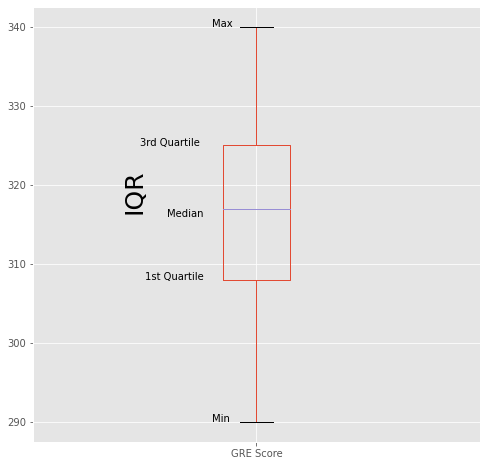

In [ ]:
df_student.boxplot(column="GRE Score",
               return_type='axes',
               figsize=(8,8))

plt.text(x=0.74, y=325, s="3rd Quartile")
plt.text(x=0.8, y=316, s="Median")
plt.text(x=0.75, y=308, s="1st Quartile")
plt.text(x=0.9, y=290, s="Min")
plt.text(x=0.9, y=340, s="Max")
plt.text(x=0.7, y=317, s="IQR", rotation=90, size=25);

#Variance and Standard deviation

**Variance and standard deviation** are two other common measures of spread

Variance and standard deviation are two other common measures of spread. The variance of a distribution is the average of the squared deviations (differences) from the mean. Use df.var() to check variance:

**Variance**

In [ ]:
df_student["GRE Score"].var()

131.64455513784458

The standard deviation is the square root of the variance. Standard deviation can be more interpretable than variance, since the standard deviation is expressed in terms of the same units as the variable in question while variance is expressed in terms of units squared. Use df.std() to check the standard deviation:

**Standard deviation**

In [ ]:
df_student["GRE Score"].std()

11.473646113500475

# mode

In [ ]:
from collections import Counter
c = Counter(df_student['GRE Score'])
c.most_common(1)

[(324, 19)]

In [ ]:
mode = scipy.stats.mode(df_student['GRE Score'])
mode

ModeResult(mode=array([312]), count=array([19]))




#Checking the distributions¶




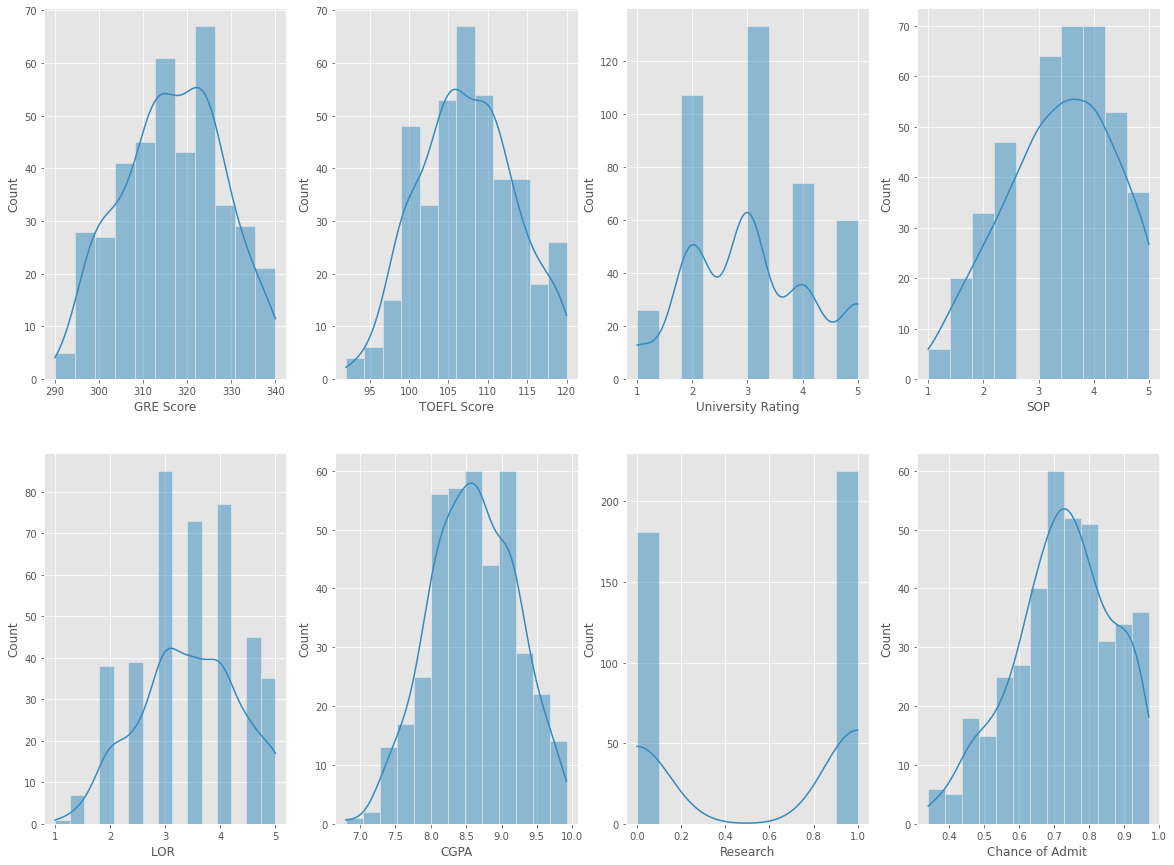

In [ ]:
plt.figure(figsize=(20,15))

x = 1
for i in df_student.columns.values:
    plt.subplot(2,4,x)
    sns.histplot(df_student[i], kde=True)
    x = x + 1

# Estimation 

In [ ]:
np.random.seed(10)

student_GRE = df_student['GRE Score']

student_GRE.mean()

316.8075

In [ ]:
np.random.seed(6)
sample_GRE = np.random.choice(a= student_GRE,
                               size=150)            # Sample 100 values

print ( sample_GRE.mean() ) 
student_GRE.mean() - sample_GRE.mean()

317.6533333333333


-0.845833333333303

In [ ]:
np.random.seed(6)
sample_GRE = np.random.choice(a= student_GRE,
                               size=200)            # Sample 100 values

print ( sample_GRE.mean() )
student_GRE.mean() - sample_GRE.mean()

317.67


-0.8625000000000114

In [ ]:
np.random.seed(6)
sample_GRE = np.random.choice(a= student_GRE,
                               size=300)            # Sample 100 values

print ( sample_GRE.mean() )
student_GRE.mean() - sample_GRE.mean()

317.49666666666667


-0.6891666666666652

The more samples we take, the better our estimate of the population parameter is likely to be.



Point estimate based on a sample of different exam reslut  individuals overestimates the true population mean by -0.689166 GRE score, but it is close. This illustrates an important point: we can get a fairly accurate estimate of a GRE score by sampling a relatively small subset of individuals.

In [ ]:
student_GRE.mean() - sample_GRE.mean()

-0.6891666666666652

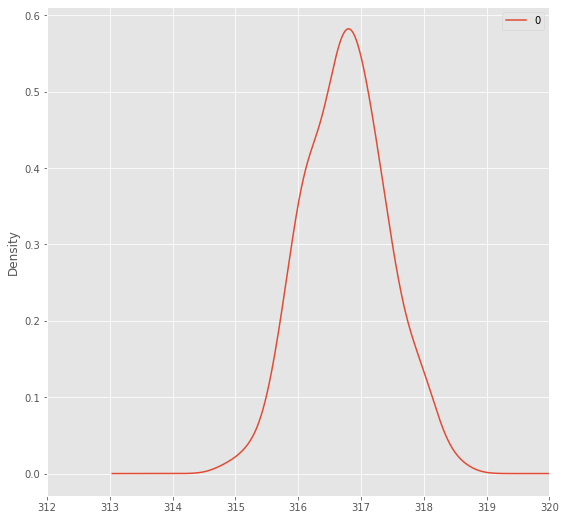

In [ ]:
np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(200):         # Generate 200 samples
    sample = np.random.choice(a= student_GRE, size=300)
    point_estimates.append( sample.mean() )
    
pd.DataFrame(point_estimates).plot(kind="density",  # Plot sample mean density
                                   figsize=(9,9),
                                   xlim=(312,320))

Let's calculate a 95% confidence for our mean point estimate:


In [ ]:
np.random.seed(10)

sample_size = 250
sample = np.random.choice(a= student_GRE, size = sample_size)
sample_mean = sample.mean()

z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*

print("z-critical value:")              # Check the z-critical value
print(z_critical)                        

GRE_stdev = student_GRE.std()  # Get the population standard deviation

margin_of_error = z_critical * (GRE_stdev/math.sqrt(sample_size))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(314.3217382272864, 317.16626177271365)


Notice that the confidence interval we calculated captures the true Student_GRE mean of  316.8075

In [ ]:
np.random.seed(10)

sample_size = 250

intervals = []
sample_means = []


for x in range(25):
    sample = np.random.choice(a= student_GRE, size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)
    
    z_critical = stats.norm.ppf(q= 0.975)

    student_GR_sd = student_GRE.std()
    # stan_error
    se = student_GR_sd / math.sqrt(sample_size)
    
    margin_of_error = z_critical * se

    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

    intervals.append(confidence_interval)

# Linear Regression


Let's works  Student data set and use linear regression to predict student Chance of Admit based on GRE Score. First, let's  look at a scatterplot of Chance of Admit and GRE Score  to get a sense of the shape of the data:

In [ ]:
X = df_student.drop(['Chance of Admit '], axis=1)
y = df_student['Chance of Admit ']

           

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)



LinearRegression()

In [ ]:
y_predict = lin_reg.predict(X_test)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


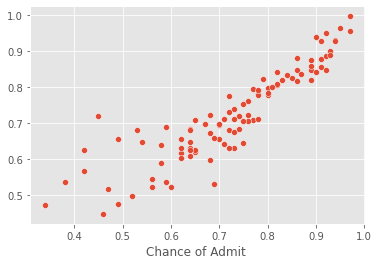

In [ ]:
sns.scatterplot(y_test, y_predict)

The scatterplot shows a roughly linear relationship between GRE SCORE and Chance of Admit, suggesting a linear regression model might work well.

In [ ]:
from sklearn import linear_model

In [ ]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(df_student["GRE Score"]), 
                     y = df_student["Chance of Admit "])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

-2.4360842448510542
[0.00997588]


The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to -2.4360842448510542 and the coefficient for the weight variable is 0.00997588. In other words, the model fit the line:

X= -2.4360842448510542 + 0.00997588*Y . 

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

In [ ]:
regression_model.score(X = pd.DataFrame(df_student["GRE Score"]), 
                     y = df_student["Chance of Admit "])

0.6441835498438334

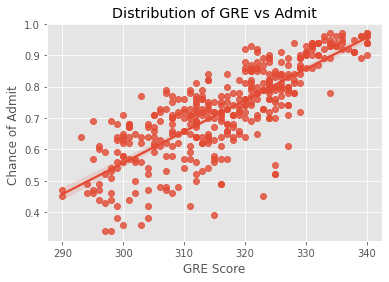

In [ ]:
sns.regplot(df_student['GRE Score'], df_student['Chance of Admit '])
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admit ')
plt.title('Distribution of GRE vs Admit')
plt.show()

Higher the GRE Score, getting the chance of admit is also high. They are positively correlated

